In [400]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.impute import KNNImputer
import statsmodels.discrete.discrete_model as sm

In [401]:
#Loading the Dataset
df= pd.read_csv("Train_Data (GP).csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [402]:
list (df)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [403]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [405]:
df.shape

(614, 13)

## Exploratory Data Analysis
### Exploratory Data Analysis is the process of performing initial investigations on data to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.
#### Read more: https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

In [406]:
print('Percent of missing "Gender" records is %.2f%%' %((df['Gender'].isnull().sum()/df.shape[0])*100))

Percent of missing "Gender" records is 2.12%


Number of people who take a loan group by gender :
Male      489
Female    112
Name: Gender, dtype: int64


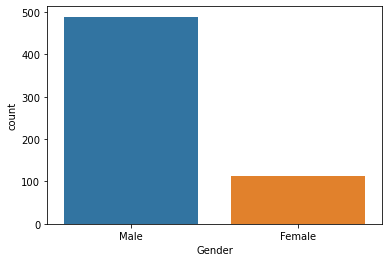

In [407]:
print("Number of people who take a loan group by gender :")
print(df['Gender'].value_counts())
sns.countplot(df['Gender'])

In [408]:
print('Percent of missing "Married" records is %.2f%%' %((df['Married'].isnull().sum()/df.shape[0])*100))

Percent of missing "Married" records is 0.49%


Number of people who take a loan group by Martial status :
Yes    398
No     213
Name: Married, dtype: int64


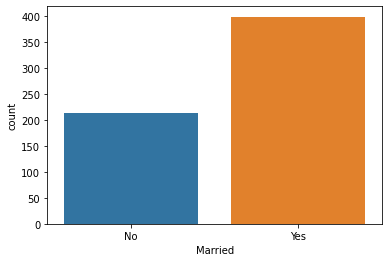

In [409]:
print("Number of people who take a loan group by Martial status :")
print(df['Married'].value_counts())
sns.countplot(df['Married'])

In [410]:
print('Percent of missing "Dependents" records is %.2f%%' %((df['Dependents'].isnull().sum()/df.shape[0])*100))

Percent of missing "Dependents" records is 2.44%


Number of people who take a loan group by Dependents :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


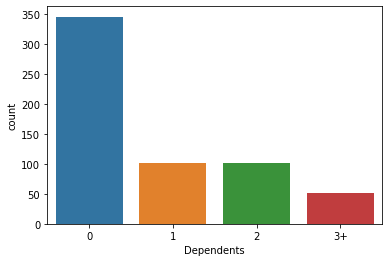

In [411]:
print("Number of people who take a loan group by Dependents :")
print(df['Dependents'].value_counts())
sns.countplot(df['Dependents'])

In [412]:
print('Percent of missing "Education" records is %.2f%%' %((df['Education'].isnull().sum()/df.shape[0])*100))

Percent of missing "Education" records is 0.00%


Number of people who take a loan group by Education :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


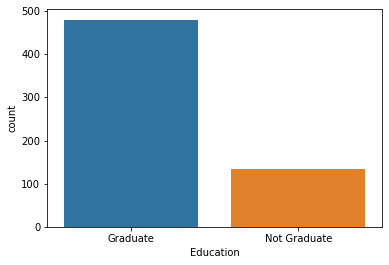

In [413]:
print("Number of people who take a loan group by Education :")
print(df['Education'].value_counts())
sns.countplot(df['Education'])

In [414]:
print('Percent of missing "Self_Employed" records is %.2f%%' %((df['Self_Employed'].isnull().sum()/df.shape[0])*100))

Percent of missing "Self_Employed" records is 5.21%


Number of people who take a loan group by Self_Employed :
No     500
Yes     82
Name: Self_Employed, dtype: int64


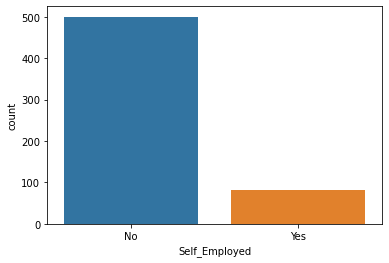

In [415]:
print("Number of people who take a loan group by Self_Employed :")
print(df['Self_Employed'].value_counts())
sns.countplot(df['Self_Employed'])

In [416]:
print('Percent of missing "Property_Area" records is %.2f%%' %((df['Property_Area'].isnull().sum()/df.shape[0])*100))

Percent of missing "Property_Area" records is 0.00%


Number of people who take a loan group by Property_Area :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


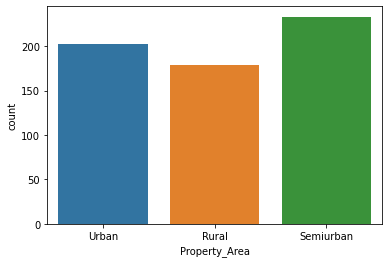

In [417]:
print("Number of people who take a loan group by Property_Area :")
print(df['Property_Area'].value_counts())
sns.countplot(df['Property_Area'])

In [418]:
print('Percent of missing "Credit_History" records is %.2f%%' %((df['Credit_History'].isnull().sum()/df.shape[0])*100))

Percent of missing "Credit_History" records is 8.14%


Number of people who take a loan group by Credit_History :
1.0    475
0.0     89
Name: Credit_History, dtype: int64


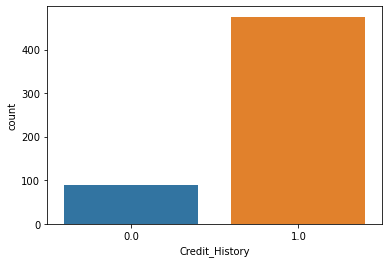

In [419]:
print("Number of people who take a loan group by Credit_History :")
print(df['Credit_History'].value_counts())
sns.countplot(df['Credit_History'])

In [420]:
print('Percent of missing "LoanAmount" records is %.2f%%' %((df['LoanAmount'].isnull().sum()/df.shape[0])*100))

Percent of missing "LoanAmount" records is 3.58%


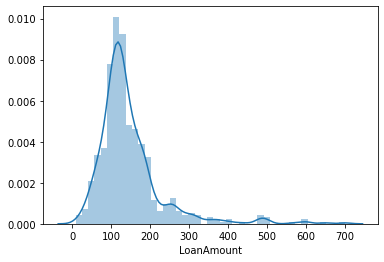

In [421]:
sns.distplot(df['LoanAmount'])

In [422]:
print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((df['Loan_Amount_Term'].isnull().sum()/df.shape[0])*100))

Percent of missing "Loan_Amount_Term" records is 2.28%


Number of people who take a loan group by Loan_Amount_Term :
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


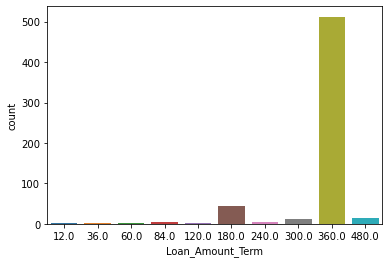

In [423]:
print("Number of people who take a loan group by Loan_Amount_Term :")
print(df['Loan_Amount_Term'].value_counts())
sns.countplot(df['Loan_Amount_Term'])

## It can be inferred from the above bar plots that:
### 1. 80% applicants in the dataset are male.
### 2. Around 65% of the applicants in the dataset are married.
### 3. Around 15% applicants in the dataset are self employed.
### 4. Around 85% applicants have repaid their debts.

## CrossTabs
### A cross-tabulation (or crosstab) is a two- (or more) dimensional table that records the number (frequency) of respondents that have the specific characteristics described in the cells of the table. 
#### Read more: (https://www.qualtrics.com/experience-management/research/cross-tabulation/)

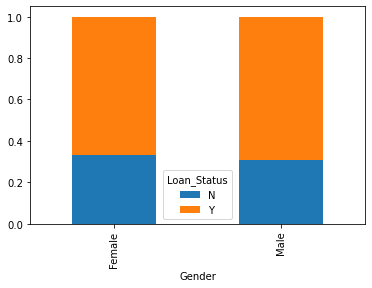

In [424]:
Gender = pd.crosstab(df['Gender'],df['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

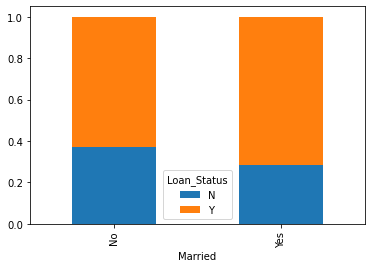

In [425]:
Married = pd.crosstab(df['Married'],df['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

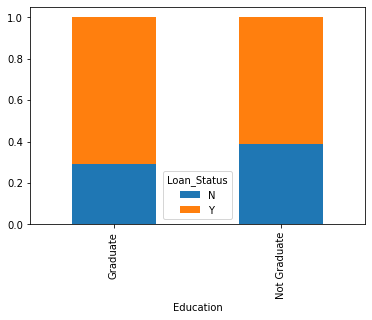

In [426]:
Education = pd.crosstab(df['Education'],df['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

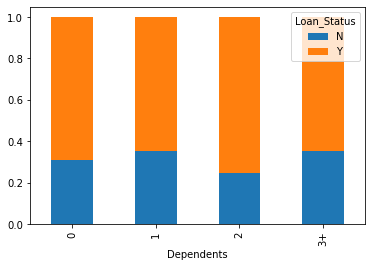

In [427]:
Dependents = pd.crosstab(df['Dependents'],df['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

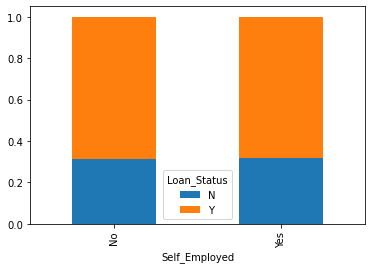

In [428]:
Self_Employed = pd.crosstab(df['Self_Employed'],df['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

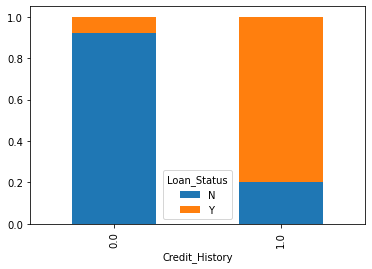

In [429]:
Credit_History = pd.crosstab(df['Credit_History'],df['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

## Analysis done from above stacked histogram -

### 1. Gender : Proportion for both male and female applicants for approved / unapproved loan are approx same.

### 2. Married : Proportion of Married applicant is more for approved loan

### 3. Dependents : Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

### 4. Self_Employed : There is nothing significant we can infer from Self_Employed vs Loan_Status plot

## 5. Credit History : people with credit history as 1 are more likely to get their loans approved.

### 6. Property_Area : Loan approval in semi urban area is more likely than Rural and Urban area

In [430]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Loan_ID - 0.0%
Gender - 2.0%
Married - 0.0%
Dependents - 2.0%
Education - 0.0%
Self_Employed - 5.0%
ApplicantIncome - 0.0%
CoapplicantIncome - 0.0%
LoanAmount - 4.0%
Loan_Amount_Term - 2.0%
Credit_History - 8.0%
Property_Area - 0.0%
Loan_Status - 0.0%


In [431]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [432]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [433]:
df = df.drop('Loan_ID',axis=1)

## Feature Creation
### Feature creation is that part of machine learning that mixes the existing features to form a new feature. for this dataset the new feature is total income which is formed by adding ApplicantIncome and CoapplicantIncome, it helps generate new derived features with more predictive power than the originals. We can perform feature creation by means of addition, subtraction, multiplication, and ratio.

#### Read more: https://www.dummies.com/programming/big-data/data-science/machine-learning-creating-features-data/

In [434]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df.head(6)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,9613.0


## Replacing all the Text values with 0 and 1 for better analysis

In [435]:
df['Gender'].replace("Male",1,inplace=True)
df['Gender'].replace("Female",0,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,1.0,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,1.0,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,1.0,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,1.0,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [436]:
df['Married'].replace("Yes",1,inplace=True)
df['Married'].replace("No",0,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,0.0,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,1.0,1.0,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,1.0,1.0,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,1.0,1.0,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,1.0,0.0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [437]:
df['Education'].replace("Graduate",1,inplace=True)
df['Education'].replace("Not Graduate",0,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,0.0,0,1,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,1.0,1.0,1,1,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,1.0,1.0,0,1,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,1.0,1.0,0,0,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,1.0,0.0,0,1,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [438]:
df['Self_Employed'].replace("Yes",1,inplace=True)
df['Self_Employed'].replace("No",0,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [439]:
df['Dependents'].replace("3+",3,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [440]:
df['Loan_Status'].replace("Y",1,inplace=True)
df['Loan_Status'].replace("N",0,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


In [441]:
df['Property_Area'].replace("Rural",1,inplace=True)
df['Property_Area'].replace("Urban",3,inplace=True)
df['Property_Area'].replace("Semiurban",2,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,3,1,5849.0
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0,6091.0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,3,1,3000.0
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,3,1,4941.0
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,3,1,6000.0


In [442]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
TotalIncome           0
dtype: int64

In [443]:
y=df.Loan_Status
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [444]:
df.pop('Loan_Status')
df['Loan_Status']=y

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,1.0,0.0,0,1,0.0,5849,0.0,NaN,360.0,1.0,3,5849.0,1
1,1.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,1,6091.0,0
2,1.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,3,3000.0,1
3,1.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,3,4941.0,1
4,1.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,3,6000.0,1


In [445]:
#Selcting target variable and independent variables
b = df.iloc[:,-1] 
a=df.iloc[:,0:12]
b.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [446]:
df['LoanAmount'].median()

128.0

In [447]:
df['Loan_Amount_Term'].median()

360.0

## Correlation
### Correlation is a statistical measure that expresses the extent to which two variables are linearly related. It’s a common tool for describing relationships without making a statement about cause and effect.
#### Read more: jmp.com/en_ca/statistics-knowledge-portal/what-is-correlation.html

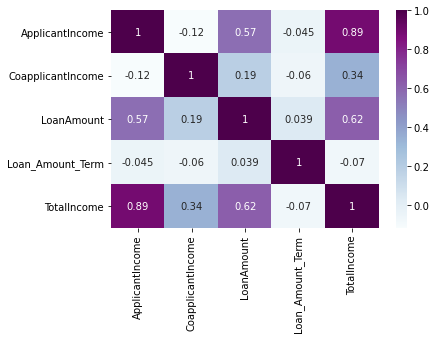

In [448]:
corr = df.corr()
heatmap_df=corr.drop(['Gender','Loan_Status','Property_Area','Credit_History','Self_Employed','Education','Married']).drop(['Gender','Loan_Status','Property_Area','Credit_History','Self_Employed','Education','Married'],axis=1)
sns.heatmap(heatmap_df,annot = True, cmap='BuPu')

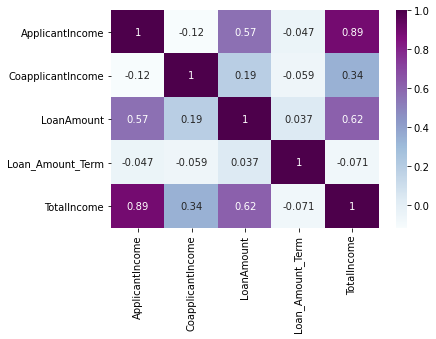

In [449]:
#Filling the LoanAmount and Loan_Amount_Term with mean of 128 and 360
df['LoanAmount'].fillna(128, inplace=True)
df['Loan_Amount_Term'].fillna(360, inplace=True)
corr = df.corr()
heatmap_df=corr.drop(['Gender','Loan_Status','Property_Area','Credit_History','Self_Employed','Education','Married']).drop(['Gender','Loan_Status','Property_Area','Credit_History','Self_Employed','Education','Married'],axis=1)
sns.heatmap(heatmap_df,annot = True, cmap='BuPu')

# Preprocessing the dataset

In the dataset the attributes correspond to Categorical and Numerical term type . Based On each type of attribute we chose a
specific strategy to handle that:

We have missing values for Gender,Married, Dependents, Self_Employed etc as per above data . We can consider these methods to fill the missing values:

1. For numerical variables: imputation using median
2. For categorical variables: imputation using mode

In [450]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [451]:
df['CoapplicantIncome'].replace(0,1,inplace=True)

In [452]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
TotalIncome          0
Loan_Status          0
dtype: int64

# Normalization using log transformation to correct positive skewness
### The log transformation is used to make highly skewed distributions less skewed. This can be valuable both for making patterns in the data more interpretable and for helping to meet the assumptions of inferential statistics.
#### Read more: https://onlinestatbook.com/2/transformations/log.html

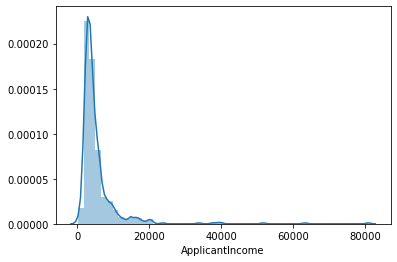

In [453]:
sns.distplot(df['ApplicantIncome'],label="Applicant Income analysis")

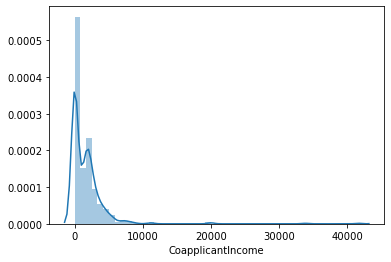

In [454]:
sns.distplot(df['CoapplicantIncome'],label="CoapplicantIncome analysis")

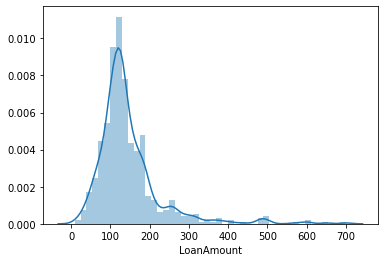

In [455]:
plt.figure()
sns.distplot(df['LoanAmount'])

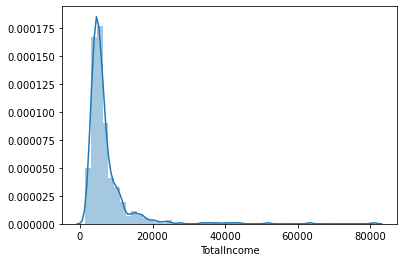

In [456]:
sns.distplot(df['TotalIncome'])

In [457]:
df.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.781759,0.133550,5403.459283,1621.690423,145.752443,342.410423,0.855049,2.037459,7024.705081,0.687296
std,0.386497,0.476373,0.413389,0.340446,6109.041673,2926.001661,84.107233,64.428629,0.352339,0.787482,6458.663872,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,1.000000,9.000000,12.000000,0.000000,1.000000,1442.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,2877.500000,1.000000,100.250000,360.000000,1.000000,1.000000,4166.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,2.000000,5416.500000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,7521.750000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,81000.000000,1.000000


In [458]:
df['ApplicantIncome']=np.log(df['ApplicantIncome'])
df['CoapplicantIncome']=np.log(df['CoapplicantIncome'])
df['TotalIncome']=np.log(df['TotalIncome'])
df['LoanAmount']=np.log(df['LoanAmount'])

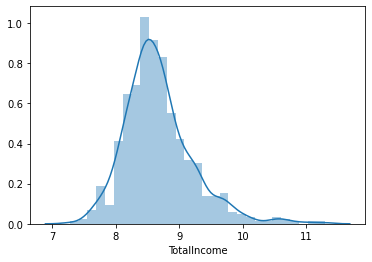

In [459]:
sns.distplot(df['TotalIncome'])

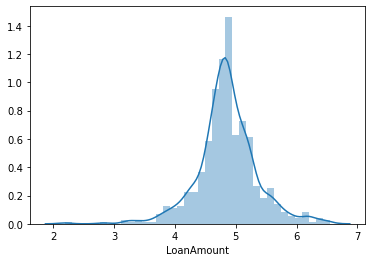

In [460]:
sns.distplot(df['LoanAmount'])

In [461]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,1.0,0.0,0,1,0.0,8.674026,0.000000,4.852030,360.0,1.0,3,8.674026,1
1,1.0,1.0,1,1,0.0,8.430109,7.318540,4.852030,360.0,1.0,1,8.714568,0
2,1.0,1.0,0,1,1.0,8.006368,0.000000,4.189655,360.0,1.0,3,8.006368,1
3,1.0,1.0,0,0,0.0,7.856707,7.765569,4.787492,360.0,1.0,3,8.505323,1
4,1.0,0.0,0,1,0.0,8.699515,0.000000,4.948760,360.0,1.0,3,8.699515,1


In [462]:
y=df.Loan_Status
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [463]:
df.pop('Loan_Status')
df['Loan_Status']=y

df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,1.0,0.0,0,1,0.0,8.674026,0.000000,4.852030,360.0,1.0,3,8.674026,1
1,1.0,1.0,1,1,0.0,8.430109,7.318540,4.852030,360.0,1.0,1,8.714568,0
2,1.0,1.0,0,1,1.0,8.006368,0.000000,4.189655,360.0,1.0,3,8.006368,1
3,1.0,1.0,0,0,0.0,7.856707,7.765569,4.787492,360.0,1.0,3,8.505323,1
4,1.0,0.0,0,1,0.0,8.699515,0.000000,4.948760,360.0,1.0,3,8.699515,1


In [464]:
#Separating Target variable attribute from other attributes
y = df.iloc[:,-1] 
x=df.iloc[:,0:12]
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1.0,0.0,0,1,0.0,8.674026,0.000000,4.852030,360.0,1.0,3,8.674026
1,1.0,1.0,1,1,0.0,8.430109,7.318540,4.852030,360.0,1.0,1,8.714568
2,1.0,1.0,0,1,1.0,8.006368,0.000000,4.189655,360.0,1.0,3,8.006368
3,1.0,1.0,0,0,0.0,7.856707,7.765569,4.787492,360.0,1.0,3,8.505323
4,1.0,0.0,0,1,0.0,8.699515,0.000000,4.948760,360.0,1.0,3,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,1,0.0,7.972466,0.000000,4.262680,360.0,1.0,1,7.972466
610,1.0,1.0,3,1,0.0,8.320205,0.000000,3.688879,180.0,1.0,1,8.320205
611,1.0,1.0,1,1,0.0,8.996157,5.480639,5.533389,360.0,1.0,3,9.025456
612,1.0,1.0,2,1,0.0,8.933664,0.000000,5.231109,360.0,1.0,3,8.933664


In [465]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

## Feature Selection using chi square test under the Filter method
### In machine learning and statistics, feature selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for several reasons:

### 1.simplification of models to make them easier to interpret by researchers/users,
### 2.shorter training times,
### 3.to avoid the curse of dimensionality,
### 4.enhanced generalization by reducing overfitting.

## Creating the Model using Logistic Regression

#### Learn more about splitting the dataset into training and testing :https://realpython.com/train-test-split-python-data/

In [466]:
# Splitting the dataset into a 75:25 Ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.25, random_state= None)

In [467]:
display(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(460, 12)

(460,)

(154, 12)

(154,)

## Logistic Regression
### Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. It is one of the simplest ML algorithms that can be used for various classification problems such as spam detection, Diabetes prediction, cancer detection etc.
#### Read more : https://www.tutorialspoint.com/machine_learning_with_python/machine_learning_with_python_classification_algorithms_logistic_regression.htm#:~:text=Logistic%20regression%20is%20a%20supervised,probability%20of%20a%20target%20variable.&text=It%20is%20one%20of%20the,Diabetes%20prediction%2C%20cancer%20detection%20etc.

In [468]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(fit_intercept = False, C = 1e9)
lr.fit(x_train,y_train)

C:\Users\ashwi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1000000000.0, fit_intercept=False)

In [469]:
y_pred=lr.predict(x_test)

In [470]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

## Confusion Matrix
### A Confusion matrix is an N x N matrix used for evaluating the performance of a classification model, where N is the number of target classes. The matrix compares the actual target values with those predicted by the machine learning model. This gives us a holistic view of how well our classification model is performing and what kinds of errors it is making.
#### Read more : https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/#:~:text=A%20Confusion%20matrix%20is%20an,by%20the%20machine%20learning%20model.

In [471]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 20,  28],
       [  4, 102]], dtype=int64)

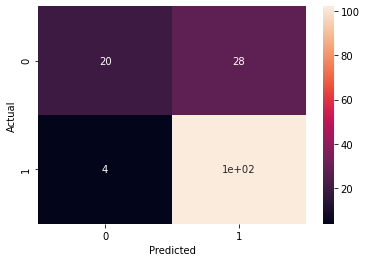

In [472]:
cnf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)

In [473]:
accuracyScore = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score : ',accuracyScore)
print('Accuracy In Percentage : ', int(accuracyScore*100), '%')

Accuracy Score :  0.7922077922077922
Accuracy In Percentage :  79 %


In [474]:
print(lr.coef_, lr.intercept_)

[[-3.39828981e-01  4.29647558e-01  3.75662199e-02  3.30965770e-01
  -3.42840635e-01  6.07464380e-01  9.59080356e-02 -3.12566057e-01
  -4.28266752e-03  4.32640488e+00  9.34627311e-02 -6.76549577e-01]] [0.]


In [475]:
X = df[['Credit_History', 'CoapplicantIncome','Loan_Amount_Term']]
X.head()

,Credit_History,CoapplicantIncome,Loan_Amount_Term
0,1.0,0.000000,360.0
1,1.0,7.318540,360.0
2,1.0,0.000000,360.0
3,1.0,7.765569,360.0
4,1.0,0.000000,360.0


In [476]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.25, random_state= None)

In [477]:
display(X_train.head(), X_test.head(), Y_train.head(), Y_test.head())

,Credit_History,CoapplicantIncome,Loan_Amount_Term
474,1.0,8.444192,360.0
591,1.0,0.000000,240.0
476,1.0,7.467371,300.0
7,0.0,7.825645,360.0
130,1.0,0.000000,480.0


,Credit_History,CoapplicantIncome,Loan_Amount_Term
271,1.0,0.000000,360.0
468,1.0,7.978311,360.0
117,1.0,7.242798,360.0
129,1.0,7.851272,360.0
412,0.0,0.000000,360.0


474    1
591    0
476    1
7      0
130    1
Name: Loan_Status, dtype: int64

271    1
468    1
117    1
129    0
412    0
Name: Loan_Status, dtype: int64

In [478]:
lr1 = LogisticRegression(fit_intercept = False, C = 1e9)
lr1.fit(X_train,Y_train)

LogisticRegression(C=1000000000.0, fit_intercept=False)

In [479]:
Y_pred=lr1.predict(X_test)

In [480]:
cnf_matrix1 = metrics.confusion_matrix(Y_test, Y_pred)
cnf_matrix1

array([[ 19,  25],
       [  1, 109]], dtype=int64)

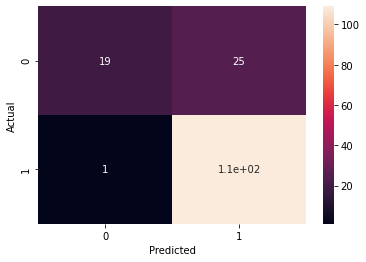

In [481]:
cnf_matrix = pd.crosstab(Y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cnf_matrix, annot=True)

In [482]:
accuracyScore = metrics.accuracy_score(Y_test, Y_pred)
print('Accuracy Score : ',accuracyScore)
print('Accuracy In Percentage : ', int(accuracyScore*100), '%')

Accuracy Score :  0.8311688311688312
Accuracy In Percentage :  83 %


## Logistic regression gives us an accuracy of 79% and after we select our 3 main features with the higest scores we get an accuracy of 83%.

In [483]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [484]:
# Predicting the Test set results
y_pred=lr.predict(x_test)

In [485]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [486]:
# Measuring Accuracy
from sklearn import metrics
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of Naive Bayes is:  0.7922077922077922


In [487]:
# Making confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 20  28]
 [  4 102]]


### We can see that Logistic Regression including all the vectors gives us an test accuracy of 79% while using logistic regression with our top 3 features (Credit_History, CoapplicantIncome, Loan_Amount_Term) gives us a higher prediction accuracy of 83%. Using Naive bays results in a 79.2% accuracy.
